In [4]:
import treecorr
import astropy.io.fits as fits
import time
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_dir = '/home/b7009348/projects/WGL_Project/DES-data/'
file_name = 'y1_im3shape_z=0.9-1.3.fits'
#file_name = 'y1_im3shape_flags=0.fits'
with fits.open(data_dir+file_name) as hdu:
    data = hdu[1].data


In [10]:
config = {'dec_col' : 'dec', 'dec_units' : 'degrees', 'file_name' : data_dir+file_name, 
         'g1_col' : 'e1', 'g2_col' : 'e2', 'max_sep' : 250, 
         'min_sep' : 2.5, 'nbins' : 20, 'ra_col' : 'ra', 'ra_units' : 'degrees',
         'sep_units' : 'arcmin', 'verbose' : 2, 'flip_g1' : False,
         'flip_g2' : False, 'w_col' : 'weight', 'k_col' : 'm', 'npatch' : 100}

In [11]:
cat  = treecorr.Catalog(data_dir+file_name, config)

   file_type assumed to be FITS from the file name.


In [17]:
gg = treecorr.GGCorrelation(config, var_method='jackknife')
#kg = treecorr.KGCorrelation(config)

nbins = 20, min,max sep = 2.5..250 arcmin, bin_size = 0.230259


In [18]:
start = time.time()
gg.process(cat)
#kg.process_cross(cat, cat)
end = time.time()
print('Runtime: %.6f'%(end-start))

varg = 0.801744: sig_sn (per component) = 0.895401
Process patch 0 auto
Starting process GG auto-correlations for cat patch 0.
Using 40 threads.
Starting 190 jobs.
Skipping 0,99 pair, which are too far apart for this set of separations
Skipping 0,98 pair, which are too far apart for this set of separations
Skipping 0,97 pair, which are too far apart for this set of separations
Skipping 0,96 pair, which are too far apart for this set of separations
Skipping 0,95 pair, which are too far apart for this set of separations
Skipping 0,94 pair, which are too far apart for this set of separations
Skipping 0,93 pair, which are too far apart for this set of separations
Skipping 0,92 pair, which are too far apart for this set of separations
Skipping 0,91 pair, which are too far apart for this set of separations
Skipping 0,90 pair, which are too far apart for this set of separations
Skipping 0,89 pair, which are too far apart for this set of separations
Skipping 0,88 pair, which are too far apart 

[-1.31931570e+04  1.79859835e+04 -5.99486658e+04  8.63220167e+04
  5.34144835e+04 -8.30325508e+04  8.90061639e+04  5.24898386e+05
  6.04836129e+05  1.81882210e+05  6.99781149e+05  9.38535420e+05
  4.23388198e+06  5.84880125e+06  8.00653087e+06  1.51302726e+07
  1.17945302e+07  2.03699296e+07  5.09678215e+07  1.34996753e+08]
[1.40720792e-04 6.49490213e-05 2.92685137e-05 2.51226914e-05
 3.93468076e-05 3.60789714e-05 3.37464909e-05 1.39280360e-05
 1.07492240e-05 2.33523835e-05 1.85391773e-05 9.62578319e-06
 8.97464064e-06 7.54306697e-06 6.45635017e-06 5.14344380e-06
 4.52853787e-06 4.06241436e-06 4.69024335e-06 4.16130010e-06]


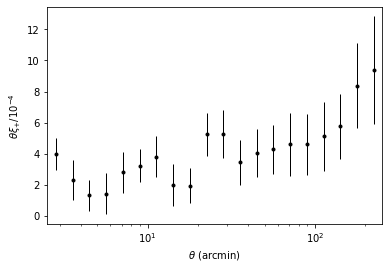

In [16]:
r = np.exp(gg.meanlogr)
sens = kg.xi
xip = gg.xip
sig = np.sqrt(gg.varxip)
plt.errorbar(r, r*xip/1e-4, yerr=r*sig/1e-4, marker='.', linewidth=0, 
             elinewidth=1, color='black')
plt.xscale('log')
plt.ylabel(r'$\theta\xi_{+}/10^{-4}$')
plt.xlabel(r'$\theta$ (arcmin)')
plt.xlim([2.5,250])
#plt.ylim([-1,6])
plt.savefig('z=0.9-1.3_shear-shear.png',dpi=150)
#plt.plot(r, -xip, color='blue')
#plt.errorbar(r[xip>0], xip[xip>0], yerr=sig[xip>0], color='grey')
#plt.errorbar(r[xip<0], xip[xip<0], yerr=sig[xip<0], color='grey')
#lp = plt.errorbar(-r, xip, yerr=sig, color='blue')

# lens-shear cross-correlation

In [193]:
source_file = 'y1_im3shape_corrected_z=0.9-1.3.fits'
lens_file = 'DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits'
#lens_file = 'DES_Y1A1_Lenses_z=0.75-0.9.fits'

source_config = {'dec_col' : 'dec', 'dec_units' : 'degrees', 'file_name' : data_dir+source_file, 
         'g1_col' : 'e1', 'g2_col' : 'e2', 'max_sep' : 250, 
         'min_sep' : 2.5, 'nbins' : 20, 'ra_col' : 'ra', 'ra_units' : 'degrees',
         'sep_units' : 'arcmin', 'verbose' : 2, 'w_col' : 'weight'}

lens_config = {'dec_col' : 'DEC', 'dec_units' : 'degrees', 'file_name' : data_dir+lens_file, 'max_sep' : 250, 
         'min_sep' : 2.5, 'nbins' : 20, 'ra_col' : 'RA', 'ra_units' : 'degrees',
         'sep_units' : 'arcmin', 'verbose' : 2, 'w_col' : 'weight'}

k_config = {'dec_col' : 'dec', 'dec_units' : 'degrees', 'file_name' : data_dir+source_file, 'max_sep' : 250, 
         'min_sep' : 2.5, 'nbins' : 20, 'ra_col' : 'ra', 'ra_units' : 'degrees',
         'sep_units' : 'arcmin', 'verbose' : 2, 'k_col' : 'm'}

In [194]:
source_cat = treecorr.Catalog(data_dir+source_file, source_config)
lens_cat = treecorr.Catalog(data_dir+lens_file, lens_config)
k_cat = treecorr.Catalog(data_dir+source_file, k_config)

Reading input file /home/b7009348/projects/WGL_Project/DES-data/y1_im3shape_corrected_z=0.9-1.3.fits
   file_type assumed to be FITS from the file name.
   nobj = 2013303
Reading input file /home/b7009348/projects/WGL_Project/DES-data/DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits
   file_type assumed to be FITS from the file name.
   nobj = 653691
Reading input file /home/b7009348/projects/WGL_Project/DES-data/y1_im3shape_corrected_z=0.9-1.3.fits
   file_type assumed to be FITS from the file name.
   nobj = 2013303


In [195]:
ng = treecorr.NGCorrelation(source_config, var_method='jackknife')
ng.process_cross(lens_cat, source_cat)

nk = treecorr.NKCorrelation(k_config)
nk.process_cross(lens_cat, k_cat)

nbins = 20, min,max sep = 2.5..250 arcmin, bin_size = 0.230259
Starting process NG cross-correlations for cats /home/b7009348/projects/WGL_Project/DES-data/DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits, /home/b7009348/projects/WGL_Project/DES-data/y1_im3shape_corrected_z=0.9-1.3.fits.
Using 40 threads.
Building NField from cat /home/b7009348/projects/WGL_Project/DES-data/DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits
Building GField from cat /home/b7009348/projects/WGL_Project/DES-data/y1_im3shape_corrected_z=0.9-1.3.fits
Starting 1024 jobs.
nbins = 20, min,max sep = 2.5..250 arcmin, bin_size = 0.230259
Starting process NK cross-correlations for cats /home/b7009348/projects/WGL_Project/DES-data/DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits, /home/b7009348/projects/WGL_Project/DES-data/y1_im3shape_corrected_z=0.9-1.3.fits.
Using 40 threads.
Building KField from cat /home/b7009348/projects/WGL_Project/DES-data/y1_im3shape_corrected_z=0.9-1.3.fits
Starting 1024 jobs.


[-0.14900065 -0.11858989 -0.10149115 -0.06888636 -0.06066439 -0.04811791
 -0.04363894 -0.03687871 -0.02475545 -0.02656628 -0.01962739 -0.01843701
 -0.01392027 -0.01161904 -0.00887273 -0.0089159  -0.00945195 -0.00857183
 -0.00483156 -0.00232171]


<ipython-input-199-6f78b58be0f4>:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


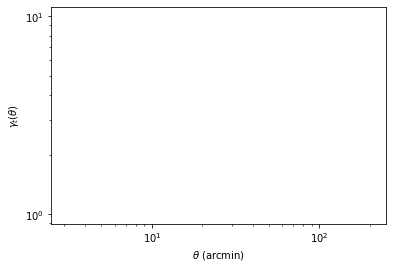

In [199]:
gt = ng.xi
sens = nk.xi
Gammat = gt/sens
print(Gammat)
r = np.exp(ng.logr)
sig = ng.varxi
plt.errorbar(r, Gammat, yerr=sig, marker='.', linewidth=0, 
             elinewidth=1, color='black', markersize=5)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\gamma_{t}(\theta)$')
plt.xlabel(r'$\theta$ (arcmin)')
plt.xlim([2.5,250])
plt.savefig('NG_all_lenses_z=0.9-1.3.png', dpi=150)